<a href="https://colab.research.google.com/github/Kev-Daran/Book-Recommendation-System/blob/main/Book_Recommendation_System_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt # visualization
!pip install seaborn as sns -q # visualization with seaborn v0.11.1
import seaborn as sns # visualization
import missingno as msno # missing values pattern visualization

import warnings # supress warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import math


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [6]:
plt.style.use('bmh')

# set pandas display option
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Load the data 
Books_df = pd.read_csv('/content/Books.csv')
Ratings_df = pd.read_csv('/content/Ratings.csv')
Users_df = pd.read_csv('/content/Users.csv')

In [7]:
Ratings_df.head().style.set_caption('Sample of Ratings data')

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
print(f'''\t  Book_df shape is {Books_df.shape}
          Ratings_df shape is {Ratings_df.shape}
          Users_df shape is {Users_df.shape}''')

	  Book_df shape is (271360, 8)
          Ratings_df shape is (1149780, 3)
          Users_df shape is (278858, 3)


In [9]:
def missing_zero_values_table(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    print(f"Your selected dataframe has "+str(df.shape[1])+" columns and "+str(df.shape[0])+" Rows.\n"
         "There are "+str(mz_table[mz_table.iloc[:,1] != 0].shape[0])+
          " columns that have missing values.")
    return mz_table.reset_index()

In [10]:
missing_zero_values_table(Users_df)

Your selected dataframe has 3 columns and 278858 Rows.
There are 1 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


In [11]:
missing_zero_values_table(Ratings_df)

Your selected dataframe has 3 columns and 1149780 Rows.
There are 0 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,ISBN,0,0.0,object
2,Book-Rating,0,0.0,int64


In [12]:
missing_zero_values_table(Books_df)

Your selected dataframe has 8 columns and 271360 Rows.
There are 0 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,ISBN,0,0.0,object
1,Book-Title,0,0.0,object
2,Book-Author,1,0.0,object
3,Year-Of-Publication,0,0.0,object
4,Publisher,2,0.0,object
5,Image-URL-S,0,0.0,object
6,Image-URL-M,0,0.0,object
7,Image-URL-L,3,0.0,object


Text(0.5, 1.0, 'Find outlier data in Age column')

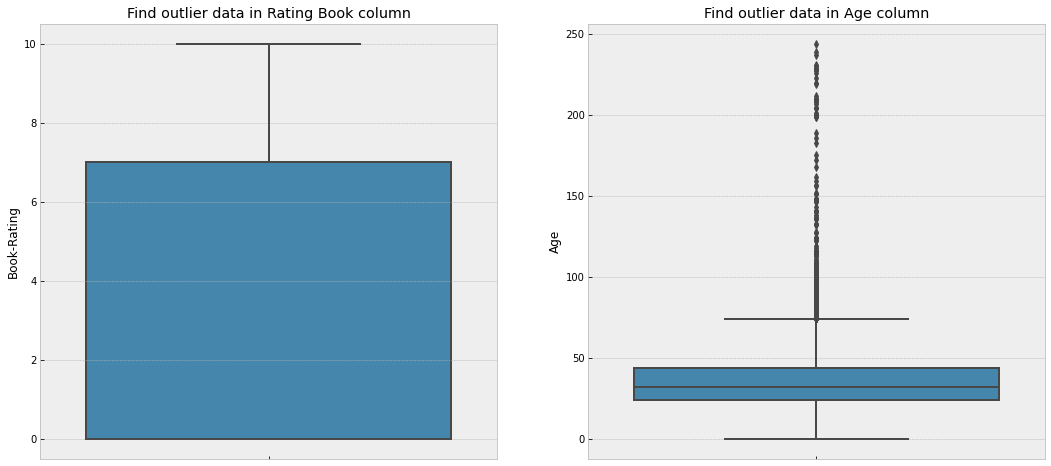

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot(y='Book-Rating', data=Ratings_df,ax=ax[0])
ax[0].set_title('Find outlier data in Rating Book column')
sns.boxplot(y='Age', data=Users_df,ax=ax[1])
ax[1].set_title('Find outlier data in Age column')

In [14]:
print(sorted(Users_df.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [15]:
Users_df.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [16]:
len(Users_df.Location.unique())

57339

In [17]:
Books_df['Book-Author'].describe()

count              271359
unique             102023
top       Agatha Christie
freq                  632
Name: Book-Author, dtype: object

In [18]:
print(Books_df['Year-Of-Publication'].unique().tolist())

[2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994, 2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980, 1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974, 1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030, 1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934, 1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004', '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993', '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996', '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988', '1963', '1956', '1970', '1985', '1978', '1973', '1980', '1979', '1975', '1969', '1961', '1965', '1939', '1958', '1950', '1953', '1966', '1971', '1959',

In [19]:
1.0 - (np.count_nonzero(Ratings_df)/float(Ratings_df.size))

0.20760754231244238

In [20]:
sorted(Ratings_df['Book-Rating'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [21]:
Ratings_df.shape[0]

1149780

In [22]:
usersCount=Users_df.shape[0]
booksCount=Books_df.shape[0]
print(f'Users : {usersCount}')
print(f'Books : {booksCount}')
print(f'Total : {usersCount*booksCount}')

Users : 278858
Books : 271360
Total : 75670906880


In [23]:
ratings_new = Ratings_df[Ratings_df.ISBN.isin(Books_df.ISBN)]
ratings_new = ratings_new[Ratings_df['User-ID'].isin(Users_df['User-ID'])]

In [24]:
print("Users or books aren't in dataset")
print(f'Total : {Ratings_df.shape[0] - ratings_new.shape[0]}')

Users or books aren't in dataset
Total : 118644


In [25]:
sparsity = round(1.0 - len(ratings_new)/float(usersCount*booksCount),6)
sparsity

0.999986

In [26]:
Ratings_df.rename(columns={'User-ID':'user_id','Book-Rating':'book_rating'},inplace=True)
Users_df.rename(columns={'User-ID':'user_id'},inplace=True)
Books_df.rename(columns={'Book-Title':'Book_Title','Book-Author':'Book_Author',
                         'Year-Of-Publication':'Year_Of_Publication'},inplace=True)

In [27]:
Users_df['Country']='Iran'
for i in Users_df:
    Users_df['Country']=Users_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')   

In [28]:
len(Users_df.Country.unique())

530

In [29]:
Users_df.isnull().sum()

user_id          0
Location         0
Age         110762
Country        368
dtype: int64

In [30]:
Users_df.loc[Users_df.Country.isnull(),'Country']='other'

In [31]:
pd.crosstab(Users_df.Country,Ratings_df.book_rating).T.style.background_gradient()

In [32]:
Users_df['Country'].replace(['','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

In [33]:
# Create column Count_All_Rate
Ratings_df['Count_All_Rate']=Ratings_df.groupby('ISBN')['user_id'].transform('count')

In [34]:
cm=sns.light_palette('green',as_cmap=True)
popular=Users_df.Country.value_counts().to_frame()[:10]
popular.rename(columns={'Country':'Count_Users_Country'},inplace=True)
popular.style.background_gradient(cmap=cm)

,Count_Users_Country
usa,139735
canada,21659
united kingdom,18557
germany,17074
spain,13258
australia,12935
italy,11282
other,4956
france,3487
portugal,3390


In [35]:
# outlier data became NaN
Users_df.loc[(Users_df.Age > 100 ) | (Users_df.Age < 5),'Age']=np.nan

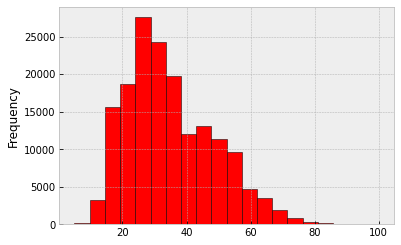

In [36]:
Users_df.Age.plot.hist(bins=20,edgecolor='black',color='red')

In [37]:
round(Users_df.Age.skew(axis=0,skipna=True),3)

0.675

In [38]:
# Series of users data live in which country 
countryUsers = Users_df.Country.value_counts()

In [39]:
country=countryUsers[countryUsers>=5].index.tolist()

In [40]:
# Range of Age users in country register in this library and had participation
RangeOfAge = Users_df.loc[Users_df.Country.isin(country)][['Country','Age']].groupby('Country').agg(np.mean).to_dict()

In [41]:
for k,v in RangeOfAge['Age'].items():
    Users_df.loc[(Users_df.Age.isnull())&(Users_df.Country== k),'Age'] = v

In [42]:
Users_df.isnull().sum()

user_id       0
Location      0
Age         330
Country       0
dtype: int64

In [43]:
medianAge = int(Users_df.Age.median())
Users_df.loc[Users_df.Age.isnull(),'Age']=medianAge
Users_df.isnull().sum()

user_id     0
Location    0
Age         0
Country     0
dtype: int64

In [44]:
Books_df[Books_df.Book_Author.isnull()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [45]:
Books_df.loc[(Books_df.ISBN=='9627982032'),'Book_Author']='other'

In [46]:
Books_df[Books_df.Publisher.isnull()]

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [47]:
Books_df.loc[(Books_df.ISBN=='193169656X'),'Publisher']='other'
Books_df.loc[(Books_df.ISBN=='1931696993'),'Publisher']='other'

In [48]:
Books_df[Books_df.Year_Of_Publication=='Gallimard']

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [49]:
Books_df[Books_df.Year_Of_Publication=='DK Publishing Inc']

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [50]:
Books_df.loc[Books_df.ISBN=='2070426769','Year_Of_Publication']=2003
Books_df.loc[Books_df.ISBN=='2070426769','Book_Author']='Gallimard'
Books_df.loc[Books_df.ISBN=='0789466953','Year_Of_Publication']=2000
Books_df.loc[Books_df.ISBN=='0789466953','Book_Author']='DK Publishing Inc'
Books_df.loc[Books_df.ISBN=='078946697X','Year_Of_Publication']=2000
Books_df.loc[Books_df.ISBN=='078946697X','Book_Author']='DK Publishing Inc'
Books_df.Year_Of_Publication=Books_df.Year_Of_Publication.astype(np.int32)
print(sorted(Books_df.Year_Of_Publication.unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [51]:
Books_df.loc[(Books_df.Year_Of_Publication>=2021)|(Books_df.Year_Of_Publication==0),'Year_Of_Publication']=np.NAN
Books_df.isnull().sum()

ISBN                      0
Book_Title                0
Book_Author               0
Year_Of_Publication    4632
Publisher                 0
Image-URL-S               0
Image-URL-M               0
Image-URL-L               3
dtype: int64

In [52]:
author=Books_df[Books_df.Year_Of_Publication.isnull()].Book_Author.unique().tolist()
RangeYearOfPublication = Books_df.loc[Books_df.Book_Author.isin(author)][['Book_Author','Year_Of_Publication']].groupby('Book_Author').agg(np.mean).round(0).to_dict()
meanYear=round(Books_df.Year_Of_Publication.mean())
authorNanYear={}
authorYear={}
for k,v in RangeYearOfPublication['Year_Of_Publication'].items():
    if math.isnan(v) != True:
        authorYear[k]=v
    else:
        authorNanYear[k] = meanYear
len(authorNanYear.keys())

1355

In [53]:
len(authorYear.keys())

1959

In [54]:
Books_df.loc[Books_df.Year_Of_Publication.isnull(),'Year_Of_Publication'] = round(Books_df.Year_Of_Publication.mean())

In [55]:
ratings_new = Ratings_df[Ratings_df.ISBN.isin(Books_df.ISBN)]
ratings_new = ratings_new[ratings_new.user_id.isin(Users_df.user_id)]

In [56]:
ratings_0 = ratings_new[ratings_new.book_rating ==0]
ratings_1to10 = ratings_new[ratings_new.book_rating !=0]
# Create column Rating average 
ratings_1to10['rating_Avg']=ratings_1to10.groupby('ISBN')['book_rating'].transform('mean')
# Create column Rating sum
ratings_1to10['rating_sum']=ratings_1to10.groupby('ISBN')['book_rating'].transform('sum')

In [57]:
ratings_0.shape[0]

647294

In [58]:
ratings_1to10.shape[0]

383842

In [59]:
ratings_1to10.head()

,user_id,ISBN,book_rating,Count_All_Rate,rating_Avg,rating_sum
1,276726,0155061224,5,2,5.000000,5
3,276729,052165615X,3,1,3.000000,3
4,276729,0521795028,6,1,6.000000,6
8,276744,038550120X,7,184,7.580247,614
16,276747,0060517794,9,66,8.000000,240


In [60]:
dataset=Users_df.copy()
dataset=pd.merge(dataset,ratings_1to10,on='user_id')
dataset=pd.merge(dataset,Books_df,on='ISBN')
def skew_test(df):
    col = df.skew(axis = 0, skipna = True)
    val = df.skew(axis = 0, skipna = True) 
    sk_table = pd.concat([col, val], axis = 1)
    sk_table = sk_table.rename(
    columns = {0 : 'skewness'})
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
        "There are " + str(sk_table.shape[0]) +
          " columns that have skewed values - Non Gaussian distribution.")
    return sk_table.drop([1], axis = 1).sort_values('skewness',ascending = False).reset_index()
skk = skew_test(dataset)
skk.style.background_gradient(cmap='Blues')

Your selected dataframe has 16 columns and 383842 Rows.
There are 7 columns that have skewed values - Non Gaussian distribution.


,index,skewness
0,Count_All_Rate,8.755342
1,rating_sum,5.974328
2,Age,0.628378
3,user_id,0.045419
4,book_rating,-0.661295
5,rating_Avg,-0.811042
6,Year_Of_Publication,-5.096793


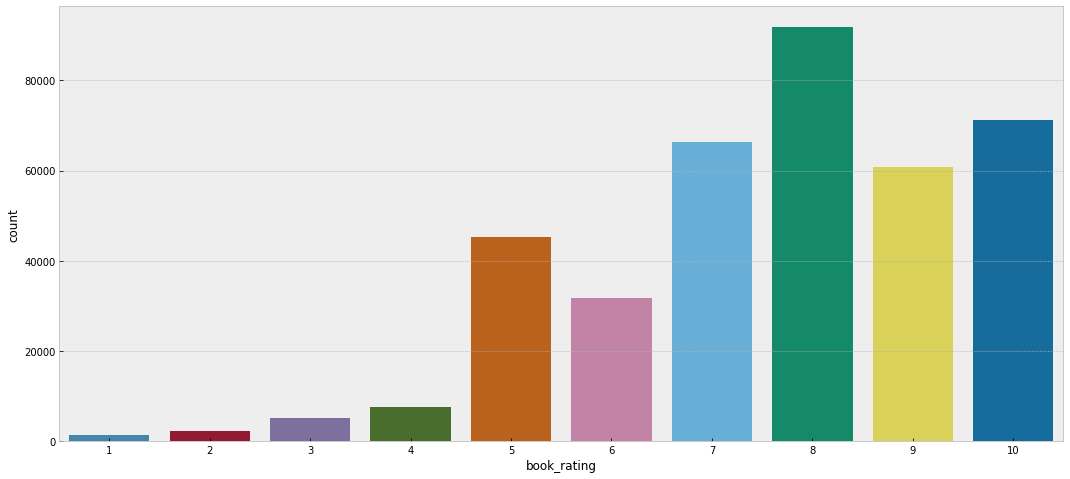

In [61]:
fig, ax = plt.subplots(figsize=(18,8))
sns.countplot(data=ratings_1to10,x='book_rating',ax=ax)

In [62]:
print(dataset.columns.tolist())

['user_id', 'Location', 'Age', 'Country', 'ISBN', 'book_rating', 'Count_All_Rate', 'rating_Avg', 'rating_sum', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


In [63]:
dataset=dataset[['user_id', 'Location', 'Age', 'Country', 'ISBN', 'book_rating', 'rating_Avg','rating_sum', 'Count_All_Rate', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher']]
missing_zero_values_table(dataset)

Your selected dataframe has 13 columns and 383842 Rows.
There are 0 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,user_id,0,0.0,int64
1,Location,0,0.0,object
2,Age,0,0.0,float64
3,Country,0,0.0,object
4,ISBN,0,0.0,object
5,book_rating,0,0.0,int64
6,rating_Avg,0,0.0,float64
7,rating_sum,0,0.0,int64
8,Count_All_Rate,0,0.0,int64
9,Book_Title,0,0.0,object


In [64]:
cm=sns.light_palette('red',as_cmap=True)
# count all rate means include users rated 0 to book
popular=dataset.groupby(['Book_Title','Count_All_Rate','rating_Avg','rating_sum']).size().reset_index().sort_values(['rating_sum','rating_Avg',0],
                                                                                                            ascending=[False,False,True])[:20]
popular.rename(columns={0:'Count_Rate'},inplace=True)
popular.style.background_gradient(cmap=cm)

,Book_Title,Count_All_Rate,rating_Avg,rating_sum,Count_Rate
121545,The Lovely Bones: A Novel,1295,8.185290,5787,707
113060,The Da Vinci Code,883,8.435318,4108,487
126798,The Red Tent (Bestselling Backlist),723,8.182768,3134,383
49901,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),571,8.939297,2798,313
128230,The Secret Life of Bees,615,8.452769,2595,307
145830,Wild Animus,2502,4.390706,2551,581
32875,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732,7.887500,2524,320
144858,Where the Heart Is (Oprah's Book Club (Paperback)),585,8.142373,2402,295
46479,Girl with a Pearl Earring,526,7.982014,2219,278
8919,Angels & Demons,586,8.100372,2179,269


In [65]:
dataset.head()

,user_id,Location,Age,Country,ISBN,book_rating,rating_Avg,rating_sum,Count_All_Rate,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,8,"timmins, ontario, canada",35.311347,canada,0002005018,5,7.666667,69,14,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,"n/a, n/a, n/a",34.241348,other,0002005018,8,7.666667,69,14,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,"toronto, ontario, canada",30.000000,canada,0002005018,8,7.666667,69,14,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,"ottawa, ,",34.241348,other,0002005018,9,7.666667,69,14,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,"kingston, ontario, canada",35.311347,canada,0002005018,9,7.666667,69,14,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [66]:
def manhattan(rating1,rating2):
    "Computes the Manhattan distance. Both rating1 and rating2 are dictionaries"
    user1=dict(zip(dataset.loc[dataset.user_id==rating1].Book_Title,dataset.loc[dataset.user_id==rating1].book_rating))
    user2=dict(zip(dataset.loc[dataset.user_id==rating2].Book_Title,dataset.loc[dataset.user_id==rating2].book_rating))
    distance = 0
    for key in user1:
        if key in user2:
            distance += abs(user1[key] - user2[key])
    return distance
print(f'Manhattan distance between user number 8 and 11676 : {manhattan(8,11676)}')

Manhattan distance between user number 8 and 11676 : 3


In [67]:
def euclidean(rating1,rating2):
    "Computes the Euclidean distance. Both rating1 and rating2 are dictionaries"
    user1=dict(zip(dataset.loc[dataset.user_id==rating1].Book_Title,dataset.loc[dataset.user_id==rating1].book_rating))
    user2=dict(zip(dataset.loc[dataset.user_id==rating2].Book_Title,dataset.loc[dataset.user_id==rating2].book_rating))
    distance = 0
    for key in user1:
        if key in user2:
            distance += math.pow(abs(user1[key]-user2[key]),2)
    return math.sqrt(distance)
print(f'Euclidean distance between user number 8 and 11676 : {euclidean(8,11676)}')

Euclidean distance between user number 8 and 11676 : 3.0


In [68]:
def minkowski(rating1,rating2,r):
    """Computes the Minkowski distance. Both rating1 and rating2 are dictionaries"""
    user1=dict(zip(dataset.loc[dataset.user_id==rating1].Book_Title,dataset.loc[dataset.user_id==rating1].book_rating))
    user2=dict(zip(dataset.loc[dataset.user_id==rating2].Book_Title,dataset.loc[dataset.user_id==rating2].book_rating))
    distance = 0
    for key in user1:
        if key in user2:
            distance += math.pow(abs(user1[key]-user2[key]),r)
    return math.pow(distance,1/r)
print(f'Minkowski distance between user number 8 and 11676 : {minkowski(8,11676,2)}') 

Minkowski distance between user number 8 and 11676 : 3.0


In [69]:
counts1 = ratings_1to10['user_id'].value_counts()
ratings_1to10 = ratings_1to10[ratings_1to10['user_id'].isin(counts1[counts1 >= 100].index)]
counts = ratings_1to10['book_rating'].value_counts()
ratings_1to10 = ratings_1to10[ratings_1to10['book_rating'].isin(counts[counts >= 100].index)]
dataset.user_id.unique().tolist()[500]

192762

In [70]:
def computeNearestNeighbor(username):
    """Creates a sorted list of users based on their distance 
    to username """
    #users = list(dataset.user_id.unique())
    users=dataset.user_id.unique().tolist()[:500]
    distances = []
    for user in users:
        if user != username:
            distance = manhattan(user,username)
            distances.append((distance,user))
    # sort based on distance -- closest first
    distances.sort()
    return distances
computeNearestNeighbor(192762)

[(0, 8),
 (0, 9),
 (0, 12),
 (0, 14),
 (0, 16),
 (0, 17),
 (0, 19),
 (0, 22),
 (0, 26),
 (0, 367),
 (0, 1032),
 (0, 2766),
 (0, 3373),
 (0, 3542),
 (0, 4017),
 (0, 4225),
 (0, 5555),
 (0, 6242),
 (0, 7409),
 (0, 7841),
 (0, 8066),
 (0, 8115),
 (0, 8253),
 (0, 8570),
 (0, 8720),
 (0, 9417),
 (0, 10215),
 (0, 10314),
 (0, 11104),
 (0, 11601),
 (0, 12863),
 (0, 13850),
 (0, 14449),
 (0, 14801),
 (0, 15720),
 (0, 15775),
 (0, 17402),
 (0, 17950),
 (0, 19011),
 (0, 19336),
 (0, 20265),
 (0, 21402),
 (0, 21576),
 (0, 21870),
 (0, 22365),
 (0, 22463),
 (0, 22625),
 (0, 23902),
 (0, 24194),
 (0, 24525),
 (0, 26084),
 (0, 27472),
 (0, 27624),
 (0, 28056),
 (0, 28222),
 (0, 28477),
 (0, 28731),
 (0, 29067),
 (0, 29855),
 (0, 29981),
 (0, 30035),
 (0, 30461),
 (0, 30487),
 (0, 30489),
 (0, 31556),
 (0, 32089),
 (0, 33974),
 (0, 34193),
 (0, 35718),
 (0, 35945),
 (0, 36003),
 (0, 36197),
 (0, 36327),
 (0, 36506),
 (0, 36907),
 (0, 36938),
 (0, 37400),
 (0, 37511),
 (0, 37712),
 (0, 37950),
 (0, 38

In [71]:
def recommend(username):
    """Give list of recommendations"""
    # first find nearest neighbor
    nearest=computeNearestNeighbor(username)[0][1]
    recommendations=[]
    # now find bands neighbor rated that user didn't
    neighborRatings = dataset.loc[dataset.user_id==nearest].Book_Title.tolist()
    userRatings = dataset.loc[dataset.user_id==username].Book_Title.tolist()
    for artist in neighborRatings:
        if not artist in userRatings:
            recommendations.append((artist,int(dataset[(dataset.Book_Title==artist) & (dataset.user_id==nearest)].book_rating)))
    return sorted(recommendations,key=lambda artistTuple : artistTuple[1],reverse=True)
print(recommend(192762))

[('Goodbye to the Buttermilk Sky', 7), ('The Witchfinder (Amos Walker Mystery Series)', 6), ('More Cunning Than Man: A Social History of Rats and Man', 6), ('Clara Callan', 5), ("Where You'll Find Me: And Other Stories", 5), ('The Middle Stories', 5), ('Jane Doe', 5)]
